## SP AI ML CA1
#### Part B: Regression, Housing dataset

### 1. Baseline scores with Linear regression

In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the data
data = pd.read_csv('data\housing\housing_king_county\kc_house_data.csv')

data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.00,3,2.50,1530,1131,3.00,0,0,...,8,1530,0,2009,0,98103,47.70,-122.35,1530,1509
21609,6600060120,20150223T000000,400000.00,4,2.50,2310,5813,2.00,0,0,...,8,2310,0,2014,0,98146,47.51,-122.36,1830,7200
21610,1523300141,20140623T000000,402101.00,2,0.75,1020,1350,2.00,0,0,...,7,1020,0,2009,0,98144,47.59,-122.30,1020,2007
21611,291310100,20150116T000000,400000.00,3,2.50,1600,2388,2.00,0,0,...,8,1600,0,2004,0,98027,47.53,-122.07,1410,1287


In [22]:
# Split the data into training and testing sets
train_data = data.sample(frac=0.8, random_state=0)
test_data = data.drop(train_data.index)

# Select the features to use in the model
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(train_data[features], train_data['price'])

# Make predictions on the testing data
test_predictions = model.predict(test_data[features])

# Calculate the mean squared error of the predictions
mse = mean_squared_error(test_data['price'], test_predictions)
print('Mean Squared Error:', mse)

# get RMSE, MAPE, R2
r2 = model.score(test_data[features], test_data['price'])
print('R2 Score:', r2)

rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

mape = np.mean(np.abs((test_data['price'] - test_predictions) / test_data['price'])) * 100
print('Mean Absolute Percentage Error:', mape)

Mean Squared Error: 35515495818.37711
R2 Score: 0.7158156940623462
Root Mean Squared Error: 188455.55396001763
Mean Absolute Percentage Error: 25.592234993871987


1. MSE: the average squared difference between the actual and the predicated values. The smaller the more accurate the model.
2. R2 score: a measure of how well the model explains the variance in the data, with higher values indicating a better fit. 
3. RMSE: a measure of the average deviation of the predictions from the actual values. 
4. MAPE: the mean of the absolute percentage errors between the predictions and actual values, and is a measure of the accuracy of the predictions.

### 2. Load packages and validate data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
data = pd.read_csv('data\housing\housing_king_county\kc_house_data.csv')

In [3]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
# Data info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [29]:
# Data describe in non-scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data_describe = data.describe()
data_describe

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000
mean,4580301520.865,540088.142,3.371,2.115,2079.900,15106.968,1.494,0.008,0.234,3.409,7.657,1788.391,291.509,1971.005,84.402,98077.940,47.560,-122.214,1986.552,12768.456
std,2876565571.312,367127.196,0.930,0.770,918.441,41420.512,0.540,0.087,0.766,0.651,1.175,828.091,442.575,29.373,401.679,53.505,0.139,0.141,685.391,27304.180
min,1000102.000,75000.000,0.000,0.000,290.000,520.000,1.000,0.000,0.000,1.000,1.000,290.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049194.000,321950.000,3.000,1.750,1427.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.230,1840.000,7620.000
75%,7308900445.000,645000.000,4.000,2.500,2550.000,10688.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


- The dataset contains 21,597 rows and 21 columns.
- The mean price of a house in the dataset is $540,088, with a standard deviation of $367,127. This suggests that there is a wide range of house prices in the dataset, with some houses being much more expensive than others.
- The mean square footage of living area is 2,079, with a standard deviation of 918. This suggests that there is a wide range of house sizes in the dataset, with some houses being much larger than others.
- The mean number of bedrooms is 3.37, with a standard deviation of 0.93. This suggests that most houses in the dataset have between 2 and 5 bedrooms.
- The mean number of bathrooms is 2.11, with a standard deviation of 0.77. This suggests that most houses in the dataset have between 1 and 3 bathrooms.
- The mean grade of a house is 7.66, with a standard deviation of 1.18. This suggests that most houses in the dataset have a grade between 6 and 8, which corresponds to "above average" or "average" quality.
- The mean condition of a house is 3.41, with a standard deviation of 0.65. This suggests that most houses in the dataset are in "average" or "good" condition.
- The mean age of a house is 46.99 years, with a standard deviation of 29.38 years. This suggests that most houses in the dataset were built between 1970 and 2000.
- The mean square footage of the lot is 15,096, with a standard deviation of 41,420. This suggests that there is a wide range of lot sizes in the dataset, with some lots being much larger than others.

Overall, these statistics provide some insights into the distribution of the features in the dataset and can help guide further analysis and modeling.

In [6]:
# Data types
print(data.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [32]:
# Data missing values
print(data.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


count     21613.00
mean     540088.14
std      367127.20
min       75000.00
25%      321950.00
50%      450000.00
75%      645000.00
max     7700000.00
Name: price, dtype: float64


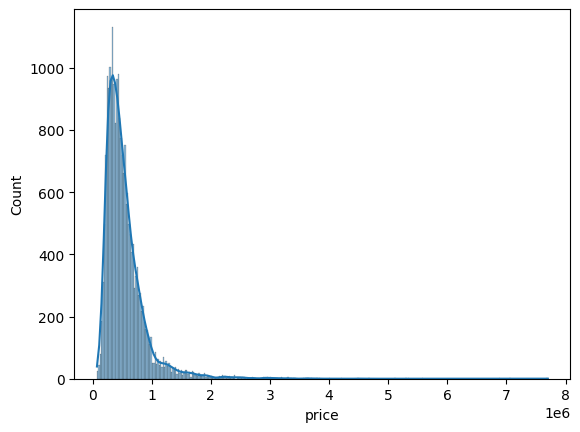

In [8]:
# Target variable rates
# convert stats to non-scienctific notation
pd.options.display.float_format = '{:.2f}'.format
print(data['price'].describe())
sns.histplot(data['price'], kde=True)
plt.show()

- The data shows house prices ranging from $78,000 to $7,700,000, with a mean price of $540,088 and a standard deviation of $367,127. This suggests that there is a wide range of house prices in the dataset, with some houses being much more expensive than others.
- The median price of a house in the dataset is $450,000, which is lower than the mean price of $540,088. This suggests that the distribution of house prices is skewed to the right, with some very expensive houses pulling up the mean price.
- The chart of house prices shows that the distribution is indeed skewed to the right, with a long tail of very expensive houses. The majority of houses in the dataset are priced between $100,000 and $1,000,000, with a peak around $400,000. However, there are also a significant number of houses priced above $1,000,000, with a few houses priced above $5,000,000.
- It also shows that the distribution of house prices is not normal, as it has a long tail to the right. This suggests that linear regression models may not be the best choice for modeling the relationship between house prices and the other features in the dataset, as they assume a normal distribution of the target variable. Or models that require a normal distribution.

The skewed and non-normal distribution of house prices may require the use of alternative modeling techniques, such as decision trees or random forests, that are better suited to handling non-normal data.

### Data preprocessing

In [34]:
# Drop unnecessary columns
data.drop(['id', 'date'], axis=1, inplace=True)

# Convert yr_renovated to binary indicator
data['yr_renovated'] = data['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

# One-hot encode zipcode column
data['zipcode'] = data['zipcode'].astype(str)
data = pd.get_dummies(data, columns=['zipcode'], drop_first=True)

# Scale numerical features
scaler = StandardScaler()
data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']] = scaler.fit_transform(data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']])

1. The 'id' and 'date' columns do not provide any useful information for predicting the price of a house, so they are dropped from the dataset to reduce the dimensionality of the data so we can improve model efficiency.

2. The 'yr_renovated' column indicates the year that the house was last renovated. By converting this column to a binary indicator, we can capture whether or not the house has been renovated without having to consider the specific year of renovation. This can simplify the model and improve its performance.

3. By one-hot encoding the 'zipcode' column, we can convert it into a set of binary variables that can be used in the machine learning model. This can improve the performance of the model by allowing it to capture the relationship between the house location and the price of the house.

4. By scaling the numerical features, we can transform the data so that it has a mean of 0 and a standard deviation of 1. This can improve the performance of the model by ensuring that all features are on the same scale and by preventing features with larger values from dominating the model.

### EDA

C:\Users\kami.cheung\AppData\Local\Temp\ipykernel_35076\4118856851.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'])


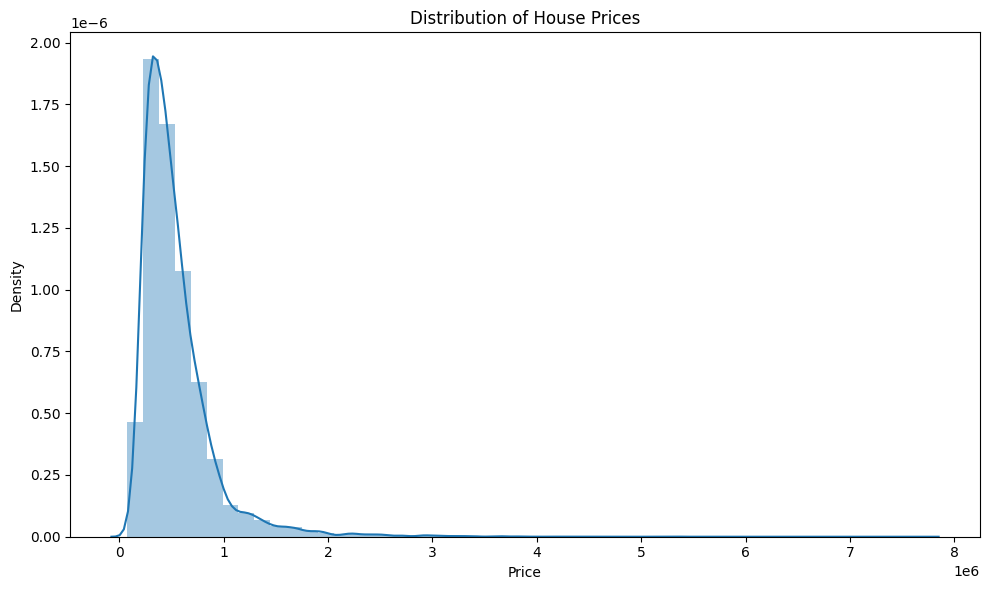

In [38]:
# Plot distribution of house prices
plt.figure(figsize=(10, 6))
sns.distplot(data['price'])
plt.title('Distribution of House Prices')
plt.xlabel('Price')

plt.tight_layout()
plt.show()

The histogram shows that the distribution of house prices is right-skewed, with a long tail to the right. This suggests that there are some very expensive houses in the dataset that are driving up the average price. 

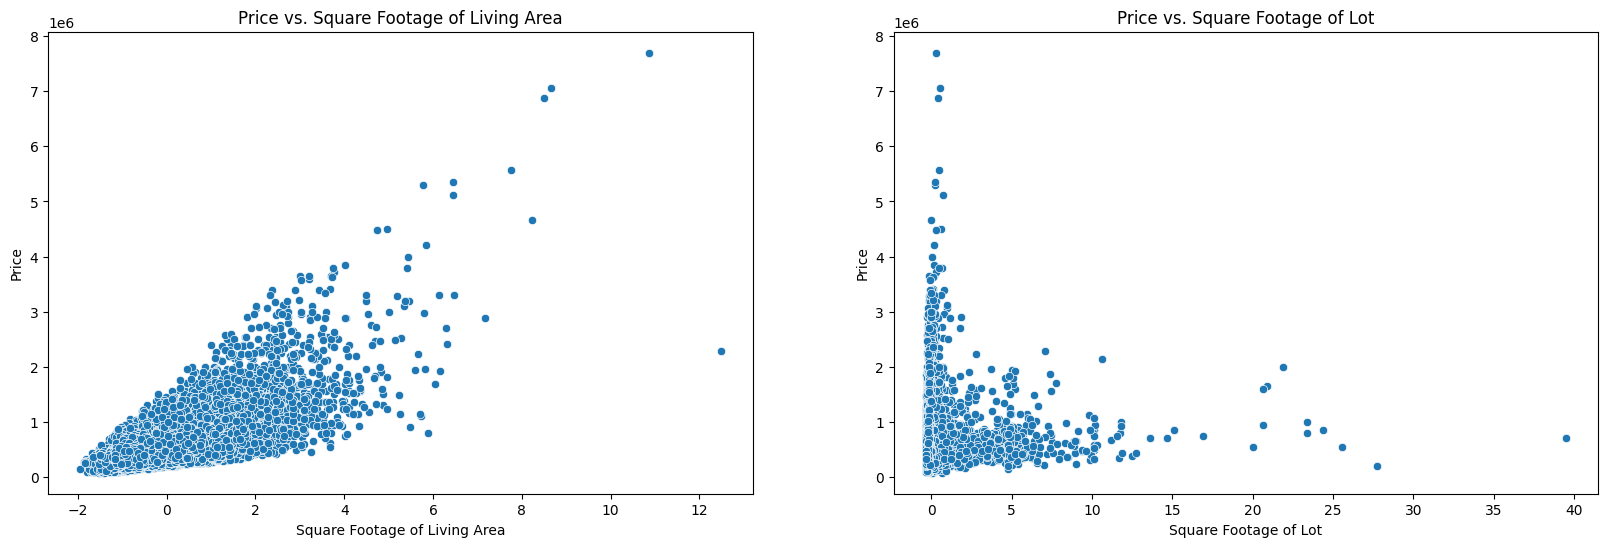

In [11]:
# Price vs. Square Footage of Living Area chart
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
sns.scatterplot(x='sqft_living', y='price', data=data, ax=ax[0])
ax[0].set_title('Price vs. Square Footage of Living Area')
ax[0].set_xlabel('Square Footage of Living Area')
ax[0].set_ylabel('Price')

# Price vs. Square Footage of Lot chart
sns.scatterplot(x='sqft_lot', y='price', data=data, ax=ax[1])
ax[1].set_title('Price vs. Square Footage of Lot')
ax[1].set_xlabel('Square Footage of Lot')
ax[1].set_ylabel('Price')
plt.show()

The first scatter plot shows the relationship between the price of a house and its square footage of living area. As expected, there is a positive linear relationship between the two variables, which means that as the square footage of living area increases, the price of the house tends to increase as well. However, there is also a lot of variability in the relationship, with some houses having a much higher price than would be expected based on their square footage of living area. This suggests that other factors, such as location, condition, and amenities, may also be important in determining the price of a house.

The second scatter plot shows the relationship between the price of a house and its square footage of lot. Unlike the first scatter plot, there is no clear linear relationship between the two variables. Instead, the relationship appears to be more complex, with some houses having a high price despite having a small lot size, and others having a low price despite having a large lot size. This suggests that other factors, such as the shape of the lot, the location of the lot, and the zoning regulations, may also be important in determining the price of a house.


Overall, the EDA analysis suggests that there may be some non-linear relationships between the features and the target variable, and that there may be some outliers in the dataset that could affect the performance of the machine learning models.

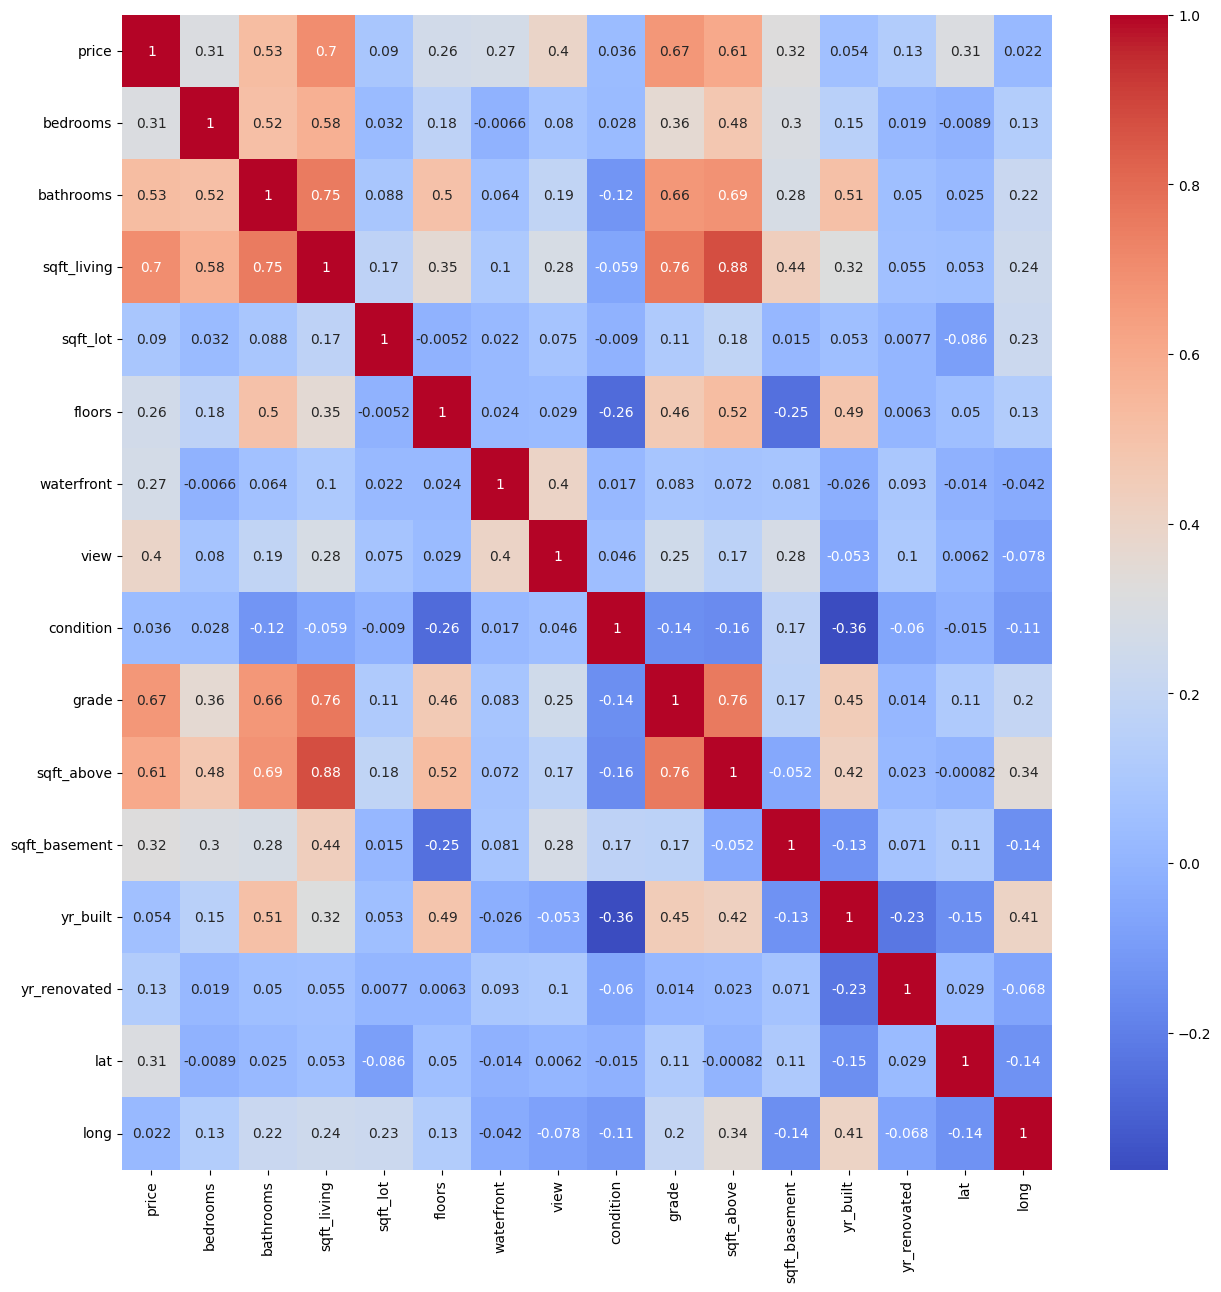

In [12]:
# drop zipcode columns
data_2 = data.drop(data.iloc[:, 16:89], axis=1)

# use seaborn to plot a heatmap to show the correlation between features without zipcode

# create a correlation matrix
corr = data_2.corr()

# plot the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


There are several features that are strongly correlated with the target variable 'price'. For example, the 'sqft_living' feature has a strong positive correlation with 'price', which means that as the square footage of the living area increases, the price of the house tends to increase as well. Similarly, the 'grade' feature has a strong positive correlation with 'price', which means that as the overall grade of the house increases, the price tends to increase as well.

On the other hand, there are also several features that are negatively correlated with 'price'. For example, the 'age' feature has a negative correlation with 'price', which means that as the age of the house increases, the price tends to decrease. Similarly, the 'condition' feature has a negative correlation with 'price', which means that as the overall condition of the house decreases, the price tends to decrease as well.

Overall, these strongly correlated features can help guide model prediction - and we should feature engineer from these columns to improve accuracy.

### Feature Engineering

In [13]:
# Calculate age of each house
data['age'] = 2022 - data['yr_built']

# Drop yr_built column
data.drop('yr_built', axis=1, inplace=True)

The 'age' feature is useful because it provides information about the condition and potential maintenance needs of the house. Older houses may require more maintenance and repairs, which could affect their value and appeal to buyers. By calculating the age of each house, we can capture this information in a single column and use it as a feature in our machine learning models.

The 'yr_built' column is dropped from the dataset as the information about the age of each house is now captured in the new 'age' column, while also reducing the dimentionality. This can help improve the performance of machine learning models by reducing the risk of overfitting and improving the interpretability of the model.

In [14]:
# Create new feature: total square footage
data['total_sqft'] = data['sqft_living'] + data['sqft_lot']

# Create new feature: price per square foot
data['price_per_sqft'] = data['price'] / data['total_sqft']

# Create new feature: number of years since renovation
data['years_since_reno'] = 2022 - data['yr_renovated']

# create new feature that incorporates grade and condition
data['grade_cond'] = data['grade'] * data['condition']

- 'total_sqft': This feature represents the total square footage of the house, which is the sum of the 'sqft_living' and 'sqft_lot' columns. For example, larger houses or lots may be more expensive than smaller ones, and this feature captures that information in a single column.

- 'price_per_sqft': This feature represents the price per square foot of the house, which is calculated by dividing the 'price' column by the 'total_sqft' column. This feature enables us to capture the price per sqft of any house regardless of its size, into a single column. This measure is also an important metric in the domain.

- 'years_since_reno': This feature represents the number of years since the house was last renovated, which is calculated by subtracting the 'yr_renovated' column from the current year (2022). This feature provides information about the age and condition of the house, which may be useful for predicting the price of the house.

Overall, these new features provide additional information about the houses in the dataset and may be useful for modeling the relationship between house prices and the other features in the dataset. The 'total_sqft' feature captures information about the size of the house and the lot, the 'price_per_sqft' feature provides a universal measure of the price of the house, and the 'years_since_reno' feature provides information about the age and condition of the house. These features can help improve the performance of machine learning models by providing additional information about the houses in the dataset - improving correlation.

In [15]:
# Model selection
# Split data into training and testing sets
X = data.drop('price', axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define list of models to evaluate
models = [
    ('Linear Regression', LinearRegression()),
    ('SVM', SVR()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('XGBoost', XGBRegressor()),
    ('LightGBM', LGBMRegressor())
]

# Loop over models to fit model on training data, make predictions on testing data, and calculate mean squared error, rmse, mape, R2 score
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2 = r2_score(y_test, y_pred)
    print(f'{name}:')
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'Mean Absolute Percentage Error: {mape}')
    print(f'R2 Score: {r2}')
    print()

Linear Regression:
Mean Squared Error: 22554059775.708694
Root Mean Squared Error: 150180.09114296307
Mean Absolute Percentage Error: 19.946037117265295
R2 Score: 0.8103493937015573

SVM:
Mean Squared Error: 124737616198.13356
Root Mean Squared Error: 353182.1289336899
Mean Absolute Percentage Error: 42.608619582671714
R2 Score: -0.048882763256538286

Decision Tree:
Mean Squared Error: 12531466921.310663
Root Mean Squared Error: 111944.03477323239
Mean Absolute Percentage Error: 8.693587962314744
R2 Score: 0.8946264963793744

Random Forest:
Mean Squared Error: 4631492719.259622
Root Mean Squared Error: 68055.07122367606
Mean Absolute Percentage Error: 5.800608327525877
R2 Score: 0.9610551088802012

XGBoost:
Mean Squared Error: 2882154237.539199
Root Mean Squared Error: 53685.69863137853
Mean Absolute Percentage Error: 6.017385259944897
R2 Score: 0.9757647933883886

LightGBM:
Mean Squared Error: 4569784202.009298
Root Mean Squared Error: 67600.1790087075
Mean Absolute Percentage Error: 

***XGBoost is the best model, let's tune this to further improve performance***

-----------------------------------

To ask: Before I feature engineered some more features, lightgbm was best at 90% r2 and xgboost at 86%, however after the new features were created - the baseline default parameter r2 scores where lightgbm at 96% and xgboost at 97.5%. What could be the reason that xgboost had such a big improvement when these features were created?

------------------------------------

XGBoost uses a pre-sorted algorithm to split continuous features when building decision trees. The pre-sorted algorithm works by first sorting the data points along each continuous feature, and then scanning through the sorted data to find the best split point for each feature.

Here's a step-by-step breakdown of how the pre-sorted algorithm works:

1. Sort the data points along each continuous feature in ascending order.
2. Initialize the left and right child nodes of the current node.
3. For each data point in the sorted feature, calculate the gain in splitting the data at that point, based on the target variable.
4. Keep track of the best split point seen so far, based on the gain.
5. Once all data points have been scanned, split the data at the best split point and assign the left and right child nodes accordingly.
6. Recursively repeat steps 2-5 for each child node, until a stopping criterion is met.

The pre-sorted algorithm can be more accurate than other splitting algorithms, such as the histogram-based approach used in LightGBM, because it considers all possible split points along each continuous feature. However, it can also be more computationally expensive and memory-intensive, especially for datasets with many features or large numbers of data points.

To address these issues, XGBoost includes several optimizations, such as subsampling and column sampling, that can reduce the computational and memory requirements of the pre-sorted algorithm. XGBoost also includes several regularization techniques, such as L1 and L2 regularization, that can help prevent overfitting and improve the generalization performance of the model.

--------------------------------

LightGBM and XGBoost are both gradient boosting frameworks that are commonly used for regression tasks. While they share many similarities, there are some key differences in their architecture that can affect their performance and scalability.

One key difference is that LightGBM uses a histogram-based approach to bin continuous features into discrete values, while XGBoost uses a pre-sorted algorithm to split continuous features. This can make LightGBM faster and more memory-efficient than XGBoost, especially when dealing with large datasets with many features.

Another difference is that LightGBM uses a leaf-wise approach to grow trees, while XGBoost uses a level-wise approach. The leaf-wise approach can result in faster convergence and better accuracy for datasets with many features, but it can also be more prone to overfitting. The level-wise approach is more conservative and can be more effective for smaller datasets or datasets with fewer features.

LightGBM also includes several advanced features, such as GPU acceleration, categorical feature support, and early stopping, that can improve its performance and scalability. XGBoost also includes many advanced features, such as regularization, cross-validation, and ensemble methods, that can improve its performance and robustness.

Overall, the choice between LightGBM and XGBoost for regression tasks will depend on the specific requirements of the task, such as the size and complexity of the dataset, the available computing resources, and the desired level of accuracy and interpretability.

### Hyperparameter tuning using Gridsearch

In [16]:
# hyperparameter tuning for xgboost 
# we use lamda and alpha to regularize, learning rate to control step size, max depth to control tree depth, n_estimators to control number of trees
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'reg_lambda': [0.01, 0.05, 0.1, 0.2, 0.3],
    'reg_alpha': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# instantiate the model
xgb = XGBRegressor()

# instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, cv=5, n_jobs=-1, verbose=2)

# fit the model
random_search.fit(X_train, y_train)

print(random_search.best_params_)
print(random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'reg_lambda': 0.1, 'reg_alpha': 0.3, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.1}
0.9699426834534524


### Create baseline xgboost with default parameters to compare performance

In [20]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split

data = pd.read_csv('data\housing\housing_king_county\kc_house_data.csv')
train_df, test_df = train_test_split(data, test_size=0.2, random_state=42)

# Define the features and target variable
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
target = 'price'

# Create the XGBoost DMatrix - the DMatrix is a data structure used by XGBoost that is optimized for performance and memory efficiency.
dtrain = xgb.DMatrix(train_df[features], label=train_df[target])
dtest = xgb.DMatrix(test_df[features], label=test_df[target])

model = xgb.train({}, dtrain)
y_pred = model.predict(dtest)

# Calculate the relevant metrics
mse = mean_squared_error(test_df[target], y_pred)
rmse = mean_squared_error(test_df[target], y_pred, squared=False)
mape = mean_absolute_percentage_error(test_df[target], y_pred) * 100
r2 = r2_score(test_df[target], y_pred)

print('MSE:', mse)
print('RMSE:', rmse)
print('MAPE:', mape)
print('R2:', r2)

MSE: 22218622005.297123
RMSE: 149059.12251619194
MAPE: 14.536756785548807
R2: 0.8530288053391014


### Now we use the best params to train and evaluate the model

In [18]:
# use best parameters to create new model
xgb = XGBRegressor(n_estimators=500, max_depth=5, learning_rate=0.1, reg_lambda=0.01, reg_alpha=0.03)

# fit model on training data
xgb.fit(X_train, y_train)

# make predictions on testing data
y_pred = xgb.predict(X_test)

# calculate mean squared error, rmse, mape, R2 score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)
print(f'XGBoost:')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'R2 Score: {r2}')

XGBoost:
Mean Squared Error: 2224514831.1229553
Root Mean Squared Error: 47164.76260009113
Mean Absolute Percentage Error: 5.405126346398723
R2 Score: 0.9812946941420843


### **Conclusion**: Feature engineering and tuning brought xgboost metrics from 
- MAPE 14% & R2 85% to 
- MAPE 5% & R2 98%
- 13% increase in R2 with almost 3x MAPE reduction; a significant improvement in performance